In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [2]:
bmi_labels = ["Underweight", "Healthy weight", "Overweight", "Obese"]
cut_bins = [0, 18.5, 24.9, 29.9, 150]
df['bmi_label'] = pd.cut(df['bmi'], bins=cut_bins, labels=bmi_labels)
print(df)

      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

           bmi_label  
0         Overweight  
1              Obese  
2              Obese  
3     Healthy weight  
4         Overweight  
...              ... 

In [3]:
df_male_ow_smokers = df.loc[df['bmi_label'].isin(["Overweight", "Obese"]) & (df['sex'] == 'male') & (df['smoker'] == 'yes')]
print(df_male_ow_smokers)

      age   sex     bmi  children smoker     region      charges   bmi_label
14     27  male  42.130         0    yes  southeast  39611.75770       Obese
19     30  male  35.300         0    yes  southwest  36837.46700       Obese
29     31  male  36.300         2    yes  southwest  38711.00000       Obese
30     22  male  35.600         0    yes  southwest  35585.57600       Obese
34     28  male  36.400         1    yes  southwest  51194.55914       Obese
...   ...   ...     ...       ...    ...        ...          ...         ...
1300   45  male  30.360         0    yes  southeast  62592.87309       Obese
1301   62  male  30.875         3    yes  northwest  46718.16325       Obese
1303   43  male  27.800         0    yes  southwest  37829.72420  Overweight
1307   32  male  28.120         4    yes  northwest  21472.47880  Overweight
1321   62  male  26.695         0    yes  northeast  28101.33305  Overweight

[136 rows x 8 columns]


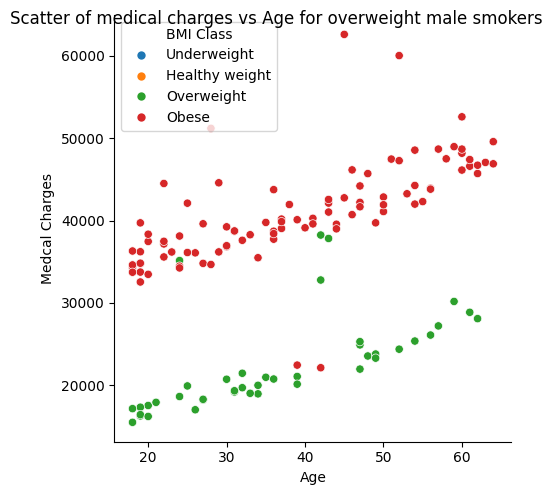

In [6]:
rel_plot = sns.relplot(df_male_ow_smokers, x='age', y='charges', hue='bmi_label', kind='scatter', facet_kws=dict(legend_out=False))
rel_plot.figure.suptitle('Scatter of medical charges vs Age for overweight male smokers')
rel_plot.set_axis_labels('Age', 'Medcal Charges')

rel_plot._legend.set_title('BMI Class')

plt.show()

In [10]:
df_male_obese_smokers = df.loc[(df['bmi_label'] == "Obese") & (df['sex'] == 'male') & (df['smoker'] == 'yes')]
print(df_male_obese_smokers)

      age   sex     bmi  children smoker     region      charges bmi_label
14     27  male  42.130         0    yes  southeast  39611.75770     Obese
19     30  male  35.300         0    yes  southwest  36837.46700     Obese
29     31  male  36.300         2    yes  southwest  38711.00000     Obese
30     22  male  35.600         0    yes  southwest  35585.57600     Obese
34     28  male  36.400         1    yes  southwest  51194.55914     Obese
...   ...   ...     ...       ...    ...        ...          ...       ...
1284   61  male  36.300         1    yes  southwest  47403.88000     Obese
1288   20  male  39.400         2    yes  southwest  38344.56600     Obese
1291   19  male  34.900         0    yes  southwest  34828.65400     Obese
1300   45  male  30.360         0    yes  southeast  62592.87309     Obese
1301   62  male  30.875         3    yes  northwest  46718.16325     Obese

[94 rows x 8 columns]


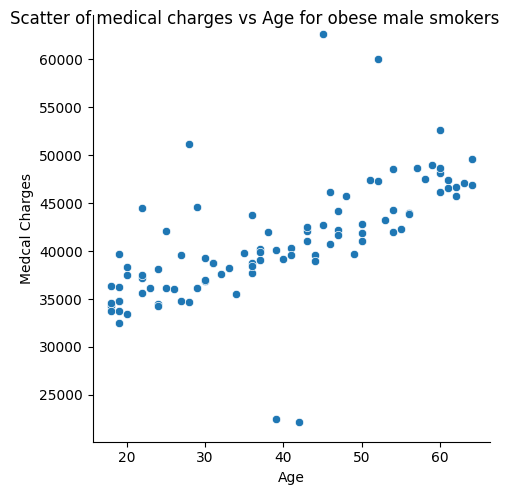

In [14]:
rel_plot = sns.relplot(df_male_obese_smokers, x='age', y='charges', kind='scatter', facet_kws=dict(legend_out=False))
rel_plot.figure.suptitle('Scatter of medical charges vs Age for obese male smokers')
rel_plot.set_axis_labels('Age', 'Medcal Charges')

plt.show()

In [19]:
#since this iterates by integer, values are first increased by *100 to get all integers,
# iterated over then divided by 100 to arrive back at the actual values
age_list = [g/100 for g in range(df_male_obese_smokers['age'].min()*100, df_male_obese_smokers['age'].max()*100)]

#this age list creates a grid of values to later plot the model against to generate
#predicted values for modeling purposes
df_plot1 = pd.DataFrame(columns=['age'])
df_plot1['age'] = age_list

for h in range (2,8):
    xi = df_plot1['age']**h
    xi_name = 'age_degree_'+str(h)
    df_plot1.insert(loc = h-1, column=xi_name, value=xi)

print(df_plot1)

[18.0, 18.01, 18.02, 18.03, 18.04, 18.05, 18.06, 18.07, 18.08, 18.09, 18.1, 18.11, 18.12, 18.13, 18.14, 18.15, 18.16, 18.17, 18.18, 18.19, 18.2, 18.21, 18.22, 18.23, 18.24, 18.25, 18.26, 18.27, 18.28, 18.29, 18.3, 18.31, 18.32, 18.33, 18.34, 18.35, 18.36, 18.37, 18.38, 18.39, 18.4, 18.41, 18.42, 18.43, 18.44, 18.45, 18.46, 18.47, 18.48, 18.49, 18.5, 18.51, 18.52, 18.53, 18.54, 18.55, 18.56, 18.57, 18.58, 18.59, 18.6, 18.61, 18.62, 18.63, 18.64, 18.65, 18.66, 18.67, 18.68, 18.69, 18.7, 18.71, 18.72, 18.73, 18.74, 18.75, 18.76, 18.77, 18.78, 18.79, 18.8, 18.81, 18.82, 18.83, 18.84, 18.85, 18.86, 18.87, 18.88, 18.89, 18.9, 18.91, 18.92, 18.93, 18.94, 18.95, 18.96, 18.97, 18.98, 18.99, 19.0, 19.01, 19.02, 19.03, 19.04, 19.05, 19.06, 19.07, 19.08, 19.09, 19.1, 19.11, 19.12, 19.13, 19.14, 19.15, 19.16, 19.17, 19.18, 19.19, 19.2, 19.21, 19.22, 19.23, 19.24, 19.25, 19.26, 19.27, 19.28, 19.29, 19.3, 19.31, 19.32, 19.33, 19.34, 19.35, 19.36, 19.37, 19.38, 19.39, 19.4, 19.41, 19.42, 19.43, 19.44,